# Data analysis of the Zimbabwe global findex database 2017
##### by Rujeko Musarurwa
This database is a large dataset that contains 1000 individuals information with over 100 different variables of which I have chosen to focus on 10 relevant variables for my analysis. The aim of this exploration is to assess the data and any relationships that may exist between the different attributes with the main variable of interest being savings.
The main feature in the dataset is the influence on savings by having a mobile money account.

Logistic Regression should be used because the response variable is categorical that can only predict two possible outcomes of saved or did not save.

In [188]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
#load Zimbabwe dataset into dataframe called df
df = pd.read_excel('thesis_dataset_zim_data.xls')
df.shape

(1000, 11)

In [190]:
#check if data loaded correctly
df.head()

,Gallup World Poll identifier,Respondent is female,Respondent age,Respondent education level,Within-economy household income quintile,Respondent is in the workforce,Owns a mobile phone,Has a mobile money account,Saved in the past year,Saved in past 12 months: for farm/business purposes,Saved in past 12 months: for old age
0,127909487,Male,39.0,secondary,Richest 20%,in workforce,yes,yes,0,no,no
1,144766923,Male,67.0,completed primary or less,Second 20%,out of workforce,no,0,yes,no,yes
2,164090858,Male,55.0,secondary,Middle 20%,out of workforce,yes,yes,yes,yes,no
3,182630524,Female,53.0,secondary,Poorest 20%,out of workforce,yes,0,yes,yes,no
4,178373653,Female,25.0,completed tertiary or more,Richest 20%,in workforce,yes,yes,yes,yes,no


In [191]:
#replace the spaces between column names with underscore
df.columns = df.columns.str.replace(' ', '_')

In [192]:
#check above has been done
df.head()

,Gallup_World_Poll_identifier,Respondent_is_female,Respondent_age,Respondent_education_level,Within-economy_household_income_quintile,Respondent_is_in_the_workforce,Owns_a_mobile_phone,Has_a_mobile_money_account,Saved_in_the_past_year,Saved_in_past_12_months:_for_farm/business_purposes,Saved_in_past_12_months:_for_old_age
0,127909487,Male,39.0,secondary,Richest 20%,in workforce,yes,yes,0,no,no
1,144766923,Male,67.0,completed primary or less,Second 20%,out of workforce,no,0,yes,no,yes
2,164090858,Male,55.0,secondary,Middle 20%,out of workforce,yes,yes,yes,yes,no
3,182630524,Female,53.0,secondary,Poorest 20%,out of workforce,yes,0,yes,yes,no
4,178373653,Female,25.0,completed tertiary or more,Richest 20%,in workforce,yes,yes,yes,yes,no


In [193]:
#rename(shorten) some variable names to make it easier for anaylsis
df.rename(columns={"Gallup_World_Poll_identifier":"unique_id", "Respondent_is_female":"female", "Respondent_age":"age", 
                   "Respondent_education_level":"education", "Within-economy_household_income_quintile":"hh_income_quintile",
                   "Owns_a_mobile_phone":"owns_mobile_phone", "Respondent_is_in_the_workforce":"in_workforce",
                   "Has_a_mobile_money_account":"mobile_money_account", "Saved_in_the_past_year":"saved", 
                   "Saved_in_past_12_months:_for_farm/business_purposes":"saved_farm_business",
                  "Saved_in_past_12_months:_for_old_age":"saved_old_age"}, inplace=True)

In [194]:
# check the datatypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             1000 non-null   int64  
 1   female                1000 non-null   object 
 2   age                   997 non-null    float64
 3   education             1000 non-null   object 
 4   hh_income_quintile    1000 non-null   object 
 5   in_workforce          1000 non-null   object 
 6   owns_mobile_phone     1000 non-null   object 
 7   mobile_money_account  1000 non-null   object 
 8   saved                 1000 non-null   object 
 9   saved_farm_business   1000 non-null   object 
 10  saved_old_age         1000 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 86.1+ KB


In [195]:
#check unique variables
df.nunique()

unique_id               1000
female                     2
age                       72
education                  5
hh_income_quintile         5
in_workforce               2
owns_mobile_phone          3
mobile_money_account       2
saved                      2
saved_farm_business        4
saved_old_age              3
dtype: int64

## check for missing values

In [196]:
# checking columns that have missing data
df.isnull().sum()

unique_id               0
female                  0
age                     3
education               0
hh_income_quintile      0
in_workforce            0
owns_mobile_phone       0
mobile_money_account    0
saved                   0
saved_farm_business     0
saved_old_age           0
dtype: int64

In [197]:
# replace values written as dk(don't know), rf(refused) or ref as missing values
df.replace({'(dk)':np.nan,'(rf)':np.nan,'(ref)':np.nan}, inplace=True)

#drop missing values
df.dropna(inplace=True)

#reset the index
df.reset_index(drop=True, inplace=True)

In [198]:
#check the values have been removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             989 non-null    int64  
 1   female                989 non-null    object 
 2   age                   989 non-null    float64
 3   education             989 non-null    object 
 4   hh_income_quintile    989 non-null    object 
 5   in_workforce          989 non-null    object 
 6   owns_mobile_phone     989 non-null    object 
 7   mobile_money_account  989 non-null    object 
 8   saved                 989 non-null    object 
 9   saved_farm_business   989 non-null    object 
 10  saved_old_age         989 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 85.1+ KB


In [199]:
#check all variables that should have two outcomes have two outcomes
df.nunique()

unique_id               989
female                    2
age                      72
education                 3
hh_income_quintile        5
in_workforce              2
owns_mobile_phone         2
mobile_money_account      2
saved                     2
saved_farm_business       2
saved_old_age             2
dtype: int64

In [200]:
df.head()

,unique_id,female,age,education,hh_income_quintile,in_workforce,owns_mobile_phone,mobile_money_account,saved,saved_farm_business,saved_old_age
0,127909487,Male,39.0,secondary,Richest 20%,in workforce,yes,yes,0,no,no
1,144766923,Male,67.0,completed primary or less,Second 20%,out of workforce,no,0,yes,no,yes
2,164090858,Male,55.0,secondary,Middle 20%,out of workforce,yes,yes,yes,yes,no
3,182630524,Female,53.0,secondary,Poorest 20%,out of workforce,yes,0,yes,yes,no
4,178373653,Female,25.0,completed tertiary or more,Richest 20%,in workforce,yes,yes,yes,yes,no


### replacing certain string values with others

In [201]:
#replace all 0 values for last four columns with a 'no' so that we have yes or no instead of yes and zero.
df["mobile_money_account"].replace({str(0): 'no'}, inplace=True)
df["saved"].replace({str(0): 'no'}, inplace=True)

In [202]:
#check corrections have been done
df.head()

,unique_id,female,age,education,hh_income_quintile,in_workforce,owns_mobile_phone,mobile_money_account,saved,saved_farm_business,saved_old_age
0,127909487,Male,39.0,secondary,Richest 20%,in workforce,yes,yes,no,no,no
1,144766923,Male,67.0,completed primary or less,Second 20%,out of workforce,no,no,yes,no,yes
2,164090858,Male,55.0,secondary,Middle 20%,out of workforce,yes,yes,yes,yes,no
3,182630524,Female,53.0,secondary,Poorest 20%,out of workforce,yes,no,yes,yes,no
4,178373653,Female,25.0,completed tertiary or more,Richest 20%,in workforce,yes,yes,yes,yes,no


In [203]:
#check all variables have two outcomes except education and income quintile
df.nunique()

unique_id               989
female                    2
age                      72
education                 3
hh_income_quintile        5
in_workforce              2
owns_mobile_phone         2
mobile_money_account      2
saved                     2
saved_farm_business       2
saved_old_age             2
dtype: int64

## Univariate exploration of variables

In [204]:
#number of females and males
df.female.value_counts()

Female    604
Male      385
Name: female, dtype: int64

In [205]:
#number of respondents that save and not save
df.saved.value_counts()

yes    540
no     449
Name: saved, dtype: int64

In [206]:
df.saved_farm_business.value_counts()

no     763
yes    226
Name: saved_farm_business, dtype: int64

In [207]:
df.saved_old_age.value_counts()

no     941
yes     48
Name: saved_old_age, dtype: int64

In [208]:
df.owns_mobile_phone.value_counts()

yes    802
no     187
Name: owns_mobile_phone, dtype: int64

In [209]:
df.mobile_money_account.value_counts()

yes    509
no     480
Name: mobile_money_account, dtype: int64

In [210]:
df.in_workforce.value_counts()

in workforce        662
out of workforce    327
Name: in_workforce, dtype: int64

In [211]:
df.education.value_counts()

secondary                     668
completed primary or less     265
completed tertiary or more     56
Name: education, dtype: int64

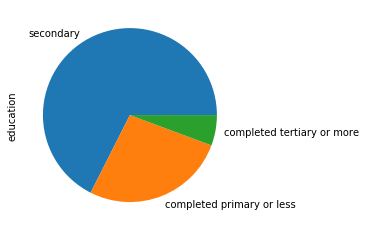

In [212]:
df.education.value_counts().plot(kind='pie');

In [213]:
df.hh_income_quintile.value_counts()

Richest 20%    251
Fourth 20%     210
Second 20%     180
Poorest 20%    174
Middle 20%     174
Name: hh_income_quintile, dtype: int64

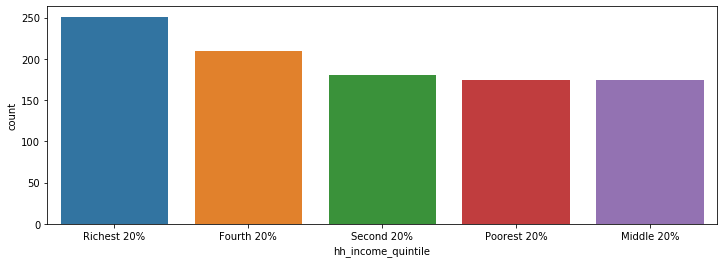

In [214]:
plt.figure(figsize = [12, 4])
#5 categories - poorest,second,middle,fourth,richest. i.e poorest, second poorest etc...
cat_order = df['hh_income_quintile'].value_counts().index
sb.countplot(data = df, x = 'hh_income_quintile', order = cat_order);

In [215]:
df.age.describe()

count    989.000000
mean      36.612740
std       16.547523
min       15.000000
25%       23.000000
50%       33.000000
75%       46.000000
max       88.000000
Name: age, dtype: float64

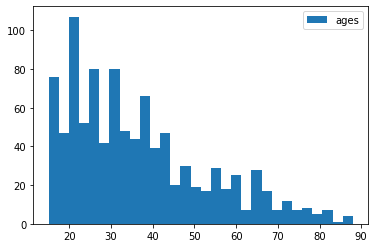

In [216]:
plt.hist(data=df, x= 'age', bins=30, label='ages')
plt.legend();

## Bivariate exploration of variables

In [217]:
# use df2 specifically only to see correlations of categorical values before changing them into dummy variables
df2=df.replace({'yes':1, 'no': 0})

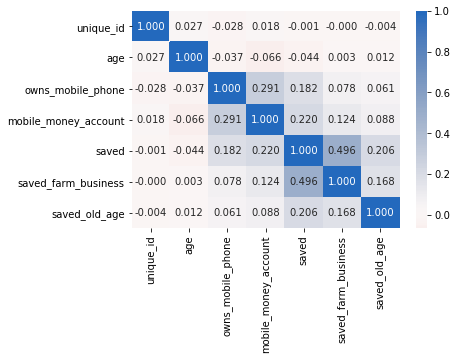

In [218]:
# heatmap showing correlations
sb.heatmap(df2.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [219]:
saved_vs_mobile_account = pd.crosstab(index=df["saved"], 
                          columns=df["mobile_money_account"])

saved_vs_mobile_account

mobile_money_account,no,yes
saved,,
no,272,177
yes,208,332


In [220]:
saved_fb_vs_mobile_account = pd.crosstab(index=df["saved_farm_business"], 
                          columns=df["mobile_money_account"])

saved_fb_vs_mobile_account

mobile_money_account,no,yes
saved_farm_business,,
no,396,367
yes,84,142


In [221]:
saved_age_vs_mobile_account = pd.crosstab(index=df["saved_old_age"], 
                          columns=df["mobile_money_account"])

saved_age_vs_mobile_account

mobile_money_account,no,yes
saved_old_age,,
no,466,475
yes,14,34


In [222]:
saved_and_owns_mobile = pd.crosstab(index=df["mobile_money_account"], 
                          columns=df["owns_mobile_phone"])

saved_and_owns_mobile

owns_mobile_phone,no,yes
mobile_money_account,,
no,147,333
yes,40,469


In [223]:
pd.crosstab([df.saved], df.education)

education,completed primary or less,completed tertiary or more,secondary
saved,,,
no,147,12,290
yes,118,44,378


In [224]:
pd.crosstab([df.saved_old_age], df.education)

education,completed primary or less,completed tertiary or more,secondary
saved_old_age,,,
no,258,47,636
yes,7,9,32


In [225]:
pd.crosstab([df.saved_farm_business], df.education)

education,completed primary or less,completed tertiary or more,secondary
saved_farm_business,,,
no,216,34,513
yes,49,22,155


In [226]:
pd.crosstab([df.saved], df.hh_income_quintile)

hh_income_quintile,Fourth 20%,Middle 20%,Poorest 20%,Richest 20%,Second 20%
saved,,,,,
no,82,91,92,89,95
yes,128,83,82,162,85


In [227]:
pd.crosstab([df.saved_old_age], df.hh_income_quintile)

hh_income_quintile,Fourth 20%,Middle 20%,Poorest 20%,Richest 20%,Second 20%
saved_old_age,,,,,
no,204,168,172,223,174
yes,6,6,2,28,6


In [228]:
pd.crosstab([df.saved_farm_business], df.hh_income_quintile)

hh_income_quintile,Fourth 20%,Middle 20%,Poorest 20%,Richest 20%,Second 20%
saved_farm_business,,,,,
no,158,136,137,189,143
yes,52,38,37,62,37


# regression
### Logistic Regression because the response variable is categorical that can only predict two possible outcomes.

In [229]:
#check to see which variables need to be prepared for the regression
df.head(2)

,unique_id,female,age,education,hh_income_quintile,in_workforce,owns_mobile_phone,mobile_money_account,saved,saved_farm_business,saved_old_age
0,127909487,Male,39.0,secondary,Richest 20%,in workforce,yes,yes,no,no,no
1,144766923,Male,67.0,completed primary or less,Second 20%,out of workforce,no,no,yes,no,yes


In [230]:
#create age squared variable
mean_age=df.age.mean() # find average age
age_cen=df.age-mean_age # subtract average age from each age value
df['age_sqr']=age_cen*age_cen # create age squared variable

In [231]:
#replace all yes values with 1 and all no's with 0, 
#for sex, female=1 and male=0
#for workforce, in_workforce=1 and out of workforce=0
df.replace({'yes':1, 'no': 0}, inplace=True)
df.replace({'Female':1, 'Male': 0}, inplace=True)
df.in_workforce.replace({'in workforce':1, 'out of workforce': 0}, inplace=True)
df.head()

,unique_id,female,age,education,hh_income_quintile,in_workforce,owns_mobile_phone,mobile_money_account,saved,saved_farm_business,saved_old_age,age_sqr
0,127909487,0,39.0,secondary,Richest 20%,1,1,1,0,0,0,5.699010
1,144766923,0,67.0,completed primary or less,Second 20%,0,0,0,1,0,1,923.385562
2,164090858,0,55.0,secondary,Middle 20%,0,1,1,1,1,0,338.091325
3,182630524,1,53.0,secondary,Poorest 20%,0,1,0,1,1,0,268.542286
4,178373653,1,25.0,completed tertiary or more,Richest 20%,1,1,1,1,1,0,134.855734


In [232]:
#For education and hh_income create dummy variables for them for the regression
education =pd.get_dummies(df['education'], drop_first=True)
income=pd.get_dummies(df['hh_income_quintile'], drop_first=True)

In [233]:
# add the dummy variobles to the dataframe
df = pd.concat([df,education,income], axis=1)

In [234]:
#check its done
df.head(1)

,unique_id,female,age,education,hh_income_quintile,in_workforce,owns_mobile_phone,mobile_money_account,saved,saved_farm_business,saved_old_age,age_sqr,completed tertiary or more,secondary,Middle 20%,Poorest 20%,Richest 20%,Second 20%
0,127909487,0,39.0,secondary,Richest 20%,1,1,1,0,0,0,5.69901,0,1,0,0,1,0


In [235]:
#drop extra variables not being used anymore since we now have dummy variables for them
df.drop(['unique_id','education','hh_income_quintile','owns_mobile_phone'],axis=1,inplace=True)

In [236]:
#check
df.head()

,female,age,in_workforce,mobile_money_account,saved,saved_farm_business,saved_old_age,age_sqr,completed tertiary or more,secondary,Middle 20%,Poorest 20%,Richest 20%,Second 20%
0,0,39.0,1,1,0,0,0,5.699010,0,1,0,0,1,0
1,0,67.0,0,0,1,0,1,923.385562,0,0,0,0,0,1
2,0,55.0,0,1,1,1,0,338.091325,0,1,1,0,0,0
3,1,53.0,0,0,1,1,0,268.542286,0,1,0,1,0,0
4,1,25.0,1,1,1,1,0,134.855734,1,0,0,0,1,0


## Run different regressions

In [237]:
#import package used for regression
import statsmodels.api as sm

In [238]:
# the logit regression model for saved
df['intercept']=1 #creating the intercept
logit_model = sm.Logit(df['saved'],df[['intercept', 'mobile_money_account']])
results1=logit_model.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.664574
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  saved   No. Observations:                  989
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Jul 2020   Pseudo R-squ.:                 0.03532
Time:                        22:22:19   Log-Likelihood:                -657.26
converged:                       True   LL-Null:                       -681.33
Covariance Type:            nonrobust   LLR p-value:                 3.984e-12
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.2683      0.092     -2.912      0.004      -0.449      -0.088
mobile_money_account     0.8972      0.131      6.852      0.000       0.641       1.154
========================================================================================
"""

In [239]:
#calculating odds ratios
print(np.exp(results1.params))

intercept               0.764706
mobile_money_account    2.452847
dtype: float64


In [240]:
# the logit regression model for saved old age
df['intercept']=1 #creating the intercept
logit_model = sm.Logit(df['saved_old_age'],df[['intercept', 'mobile_money_account']])
results2=logit_model.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.190218
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          saved_old_age   No. Observations:                  989
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Jul 2020   Pseudo R-squ.:                 0.02038
Time:                        22:22:19   Log-Likelihood:                -188.13
converged:                       True   LL-Null:                       -192.04
Covariance Type:            nonrobust   LLR p-value:                  0.005143
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -3.5051      0.271    -12.922      0.000      -4.037      -2.973
mobile_money_account     0.8682      0.324      2.678      0.007       0.233       1.504
========================================================================================
"""

In [241]:
#calculating odds ratios
print(np.exp(results2.params))

intercept               0.030043
mobile_money_account    2.382556
dtype: float64


In [242]:
# the logit regression model for saved farm business
df['intercept']=1 #creating the intercept
logit_model = sm.Logit(df['saved_farm_business'],df[['intercept', 'mobile_money_account']])
results3=logit_model.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.529737
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     saved_farm_business   No. Observations:                  989
Model:                           Logit   Df Residuals:                      987
Method:                            MLE   Df Model:                            1
Date:                 Mon, 20 Jul 2020   Pseudo R-squ.:                 0.01440
Time:                         22:22:19   Log-Likelihood:                -523.91
converged:                        True   LL-Null:                       -531.56
Covariance Type:             nonrobust   LLR p-value:                 9.148e-05
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -1.5506      0.120    -12.908      0.000      -1.786      -1.315
mobile_money_account     0.6011      0.156      3.864      0.000       0.296       0.906
========================================================================================
"""

In [243]:
print(np.exp(results3.params))

intercept               0.212121
mobile_money_account    1.824056
dtype: float64


In [244]:
#include controls
logit_model = sm.Logit(df['saved'],df[['intercept', 'mobile_money_account','female','age', 'age_sqr','in_workforce',
                                       'completed tertiary or more','secondary', 
                                       'Poorest 20%','Second 20%','Middle 20%', 'Richest 20%']])
results4=logit_model.fit()
results4.summary()

Optimization terminated successfully.
         Current function value: 0.648253
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  saved   No. Observations:                  989
Model:                          Logit   Df Residuals:                      977
Method:                           MLE   Df Model:                           11
Date:                Mon, 20 Jul 2020   Pseudo R-squ.:                 0.05901
Time:                        22:22:19   Log-Likelihood:                -641.12
converged:                       True   LL-Null:                       -681.33
Covariance Type:            nonrobust   LLR p-value:                 1.226e-12
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                     -0.5707      0.320     -1.783      0.075      -1.198       0.057
mobile_money_account           0.7399      0.139      5.329      0.000       0.468       1.012
female                         0.1888      0.142      1.329      0.184      -0.090       0.467
age                           -0.0015      0.005     -0.288      0.773      -0.012       0.009
age_sqr                        0.0002      0.000      0.678      0.498      -0.000       0.001
in_workforce                   0.4889      0.150      3.254      0.001       0.194       0.783
completed tertiary or more     0.9717      0.382      2.543      0.011       0.223       1.721
secondary                      0.2183      0.174      1.258      0.208      -0.122       0.558
Poorest 20%                   -0.3493      0.220     -1.587      0.112      -0.781       0.082
Second 20%                    -0.4920      0.215     -2.291      0.022      -0.913      -0.071
Middle 20%                    -0.4311      0.215     -2.010      0.044      -0.852      -0.011
Richest 20%                   -0.0387      0.205     -0.189      0.850      -0.440       0.362
==============================================================================================
"""

In [245]:
print(np.exp(results4.params))

intercept                     0.565140
mobile_money_account          2.095682
female                        1.207746
age                           0.998464
age_sqr                       1.000154
in_workforce                  1.630516
completed tertiary or more    2.642489
secondary                     1.243999
Poorest 20%                   0.705162
Second 20%                    0.611414
Middle 20%                    0.649762
Richest 20%                   0.961996
dtype: float64


In [246]:
logit_model = sm.Logit(df['saved_old_age'],df[['intercept', 'mobile_money_account','female','age', 'age_sqr','in_workforce',
                                       'completed tertiary or more','secondary', 
                                       'Poorest 20%','Second 20%','Middle 20%', 'Richest 20%']])
results5=logit_model.fit()
results5.summary()

Optimization terminated successfully.
         Current function value: 0.175815
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          saved_old_age   No. Observations:                  989
Model:                          Logit   Df Residuals:                      977
Method:                           MLE   Df Model:                           11
Date:                Mon, 20 Jul 2020   Pseudo R-squ.:                 0.09456
Time:                        22:22:20   Log-Likelihood:                -173.88
converged:                       True   LL-Null:                       -192.04
Covariance Type:            nonrobust   LLR p-value:                 0.0001498
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                     -4.4187      0.858     -5.150      0.000      -6.100      -2.737
mobile_money_account           0.5194      0.348      1.493      0.135      -0.163       1.201
female                        -0.2929      0.314     -0.931      0.352      -0.909       0.323
age                            0.0181      0.013      1.404      0.160      -0.007       0.043
age_sqr                       -0.0002      0.001     -0.338      0.735      -0.001       0.001
in_workforce                  -0.1818      0.352     -0.516      0.606      -0.872       0.509
completed tertiary or more     0.9055      0.640      1.414      0.157      -0.350       2.161
secondary                      0.2435      0.501      0.486      0.627      -0.738       1.225
Poorest 20%                   -0.7590      0.838     -0.905      0.365      -2.402       0.884
Second 20%                     0.2193      0.598      0.367      0.714      -0.953       1.392
Middle 20%                     0.2950      0.592      0.498      0.618      -0.866       1.456
Richest 20%                    1.2925      0.475      2.724      0.006       0.362       2.223
==============================================================================================
"""

In [247]:
print(np.exp(results5.params))

intercept                     0.012050
mobile_money_account          1.681080
female                        0.746101
age                           1.018294
age_sqr                       0.999806
in_workforce                  0.833762
completed tertiary or more    2.473097
secondary                     1.275671
Poorest 20%                   0.468132
Second 20%                    1.245171
Middle 20%                    1.343156
Richest 20%                   3.641924
dtype: float64


In [248]:
logit_model = sm.Logit(df['saved_farm_business'],df[['intercept', 'mobile_money_account','female','age', 'age_sqr',
                                       'in_workforce','completed tertiary or more','secondary', 
                                       'Poorest 20%','Second 20%','Middle 20%', 'Richest 20%']])
results6=logit_model.fit()
results6.summary()

Optimization terminated successfully.
         Current function value: 0.512694
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     saved_farm_business   No. Observations:                  989
Model:                           Logit   Df Residuals:                      977
Method:                            MLE   Df Model:                           11
Date:                 Mon, 20 Jul 2020   Pseudo R-squ.:                 0.04611
Time:                         22:22:20   Log-Likelihood:                -507.05
converged:                        True   LL-Null:                       -531.56
Covariance Type:             nonrobust   LLR p-value:                 9.401e-07
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                     -2.3543      0.400     -5.881      0.000      -3.139      -1.570
mobile_money_account           0.4670      0.167      2.802      0.005       0.140       0.794
female                        -0.1107      0.162     -0.685      0.493      -0.428       0.206
age                            0.0062      0.006      0.959      0.337      -0.006       0.019
age_sqr                    -8.644e-05      0.000     -0.306      0.760      -0.001       0.000
in_workforce                   0.8632      0.197      4.376      0.000       0.477       1.250
completed tertiary or more     0.8998      0.364      2.470      0.014       0.186       1.614
secondary                      0.2038      0.212      0.959      0.337      -0.213       0.620
Poorest 20%                    0.0245      0.260      0.094      0.925      -0.485       0.534
Second 20%                    -0.1631      0.254     -0.643      0.520      -0.660       0.334
Middle 20%                    -0.0564      0.251     -0.224      0.822      -0.549       0.436
Richest 20%                   -0.2136      0.232     -0.921      0.357      -0.668       0.241
==============================================================================================
"""

In [249]:
print(np.exp(results6.params))

intercept                     0.094956
mobile_money_account          1.595219
female                        0.895196
age                           1.006236
age_sqr                       0.999914
in_workforce                  2.370668
completed tertiary or more    2.458996
secondary                     1.226034
Poorest 20%                   1.024777
Second 20%                    0.849495
Middle 20%                    0.945192
Richest 20%                   0.807634
dtype: float64


## Make regression outputs look more presentable

In [250]:
#import library required for regression summary tables
from statsmodels.iolib.summary2 import summary_col

In [251]:
#summary table for regression for saved variable with controls
res1=summary_col([results4],stars=True,float_format='%0.2f',
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))})
print(res1)


                            saved 
----------------------------------
intercept                  -0.57* 
                           (0.32) 
mobile_money_account       0.74***
                           (0.14) 
female                     0.19   
                           (0.14) 
age                        -0.00  
                           (0.01) 
age_sqr                    0.00   
                           (0.00) 
in_workforce               0.49***
                           (0.15) 
completed tertiary or more 0.97** 
                           (0.38) 
secondary                  0.22   
                           (0.17) 
Poorest 20%                -0.35  
                           (0.22) 
Second 20%                 -0.49**
                           (0.21) 
Middle 20%                 -0.43**
                           (0.21) 
Richest 20%                -0.04  
                           (0.20) 
N                          989    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p

In [252]:
res2=summary_col([results5],stars=True,float_format='%0.2f',
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))})
print(res2)


                           saved_old_age
----------------------------------------
intercept                  -4.42***     
                           (0.86)       
mobile_money_account       0.52         
                           (0.35)       
female                     -0.29        
                           (0.31)       
age                        0.02         
                           (0.01)       
age_sqr                    -0.00        
                           (0.00)       
in_workforce               -0.18        
                           (0.35)       
completed tertiary or more 0.91         
                           (0.64)       
secondary                  0.24         
                           (0.50)       
Poorest 20%                -0.76        
                           (0.84)       
Second 20%                 0.22         
                           (0.60)       
Middle 20%                 0.30         
                           (0.59)       
Richest 20%    

In [253]:
res3=summary_col([results6],stars=True,float_format='%0.2f',
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))})
print(res3)


                           saved_farm_business
----------------------------------------------
intercept                  -2.35***           
                           (0.40)             
mobile_money_account       0.47***            
                           (0.17)             
female                     -0.11              
                           (0.16)             
age                        0.01               
                           (0.01)             
age_sqr                    -0.00              
                           (0.00)             
in_workforce               0.86***            
                           (0.20)             
completed tertiary or more 0.90**             
                           (0.36)             
secondary                  0.20               
                           (0.21)             
Poorest 20%                0.02               
                           (0.26)             
Second 20%                 -0.16              
            

In [254]:
#regression summary table of all three regression outputs
res=summary_col([results4,results5,results6],stars=True,float_format='%0.2f',
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))})
print(res)


                            saved  saved_old_age saved_farm_business
--------------------------------------------------------------------
intercept                  -0.57*  -4.42***      -2.35***           
                           (0.32)  (0.86)        (0.40)             
mobile_money_account       0.74*** 0.52          0.47***            
                           (0.14)  (0.35)        (0.17)             
female                     0.19    -0.29         -0.11              
                           (0.14)  (0.31)        (0.16)             
age                        -0.00   0.02          0.01               
                           (0.01)  (0.01)        (0.01)             
age_sqr                    0.00    -0.00         -0.00              
                           (0.00)  (0.00)        (0.00)             
in_workforce               0.49*** -0.18         0.86***            
                           (0.15)  (0.35)        (0.20)             
completed tertiary or more 0.97**